In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

/Users/ajitesh/Desktop/AI_ML_Learn/.venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/ajitesh/Desktop/AI_ML_Learn/.venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/ajitesh/Desktop/AI_ML_Learn/.venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resour

Num GPUs Available: 0
TensorFlow version: 2.20.0-rc0
Num GPUs Available: 0


In [7]:
# generators --> to process images in batches ,nho toh kaafi sara data hojayega
train_ds = keras.utils.image_dataset_from_directory(
    directory="./Dataset/train",
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
) 

test_ds = keras.utils.image_dataset_from_directory(
    directory="./Dataset/test",
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
) 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator = test_datagen.flow_from_directory(
    './Dataset/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [4]:
# but all pizel values are not same -> 0-255, so we need to normalize them 0-1

def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)  # Normalize to [0, 1]
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)


In [5]:
# create CNN model
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/opt/homebrew/Caskroom/miniforge/base/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit( # agar data augmentation to use karna hai toh use fit_generator
    train_ds, # train_generator, #steps_per_epoch=len(train_ds),
    epochs=10, 
    validation_data=test_ds)

Epoch 1/10


2025-08-08 01:19:55.995509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 70ms/step - accuracy: 0.5512 - loss: 1.2564 - val_accuracy: 0.6320 - val_loss: 0.6459
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.5607 - loss: 0.8241 - val_accuracy: 0.5010 - val_loss: 9.0753
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.5831 - loss: 1.6230 - val_accuracy: 0.6000 - val_loss: 1.3484
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.5454 - loss: 8.0134 - val_accuracy: 0.5728 - val_loss: 2.4901
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.5329 - loss: 8.2199 - val_accuracy: 0.4920 - val_loss: 9.2317
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.5108 - loss: 16.0415 - val_accuracy: 0.4844 - val_loss: 11.0615
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 73ms/step - accuracy: 0.5163 - loss: 26.9016 - val_accuracy: 0.5972 - val_loss: 12.0050
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.5480 - loss: 36.0076 - val_ac

In [27]:
import cv2
import matplotlib.pyplot as plt

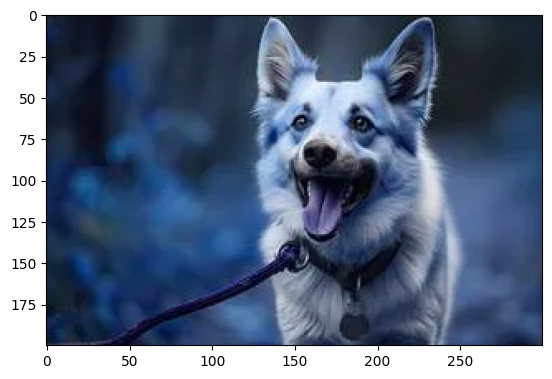

In [28]:
test_img= cv2.imread('./dog.webp')
plt.imshow(test_img)

In [29]:
#resize
test_img = cv2.resize(test_img, (256, 256))

In [30]:
test_input=test_img.reshape(1,256,256,3)

In [31]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.]], dtype=float32)